<a href="https://colab.research.google.com/github/SreekarKaja/Procarcination_Index_Grade_prediction/blob/main/PI_prediction(2buckets).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Load your data into a Pandas DataFrame
# Replace 'your_data.csv' with the actual file name or path
df = pd.read_csv('anonymized_data2.csv')

In [ ]:
df.head()

,UniqueID,Section,Semester,TestControl,LAB_Avg_PI,LAB_grade_Avg,ASSIGN_PI_avg,ASSIGN_grade_Avg,QUIZ_PI_Avg,Quiz_Grade_Avg.,Final_PI_Avg,Final_Grade_Avg,final_weigth_PI
0,15370586,1112W05,SP23,Test,0.182,60.915,0.667,73.333,0.833,75.555,0.561,69.935,0.412
1,77961443,1112W05,SP23,Test,0.000,100.356,0.333,82.667,0.000,98.194,0.111,93.739,0.100
2,53413709,1112W05,SP23,Test,0.000,98.235,0.000,82.667,0.000,98.888,0.000,93.263,0.000
3,7576054,1112W05,SP23,Test,0.364,87.102,1.000,73.833,0.583,94.798,0.649,85.244,0.508
4,16045563,1112W05,SP23,Test,0.000,84.312,0.000,82.500,0.000,96.944,0.000,87.919,0.000


In [ ]:
df.describe()

,UniqueID,LAB_Avg_PI,LAB_grade_Avg,ASSIGN_PI_avg,ASSIGN_grade_Avg,QUIZ_PI_Avg,Quiz_Grade_Avg.,Final_PI_Avg,Final_Grade_Avg,final_weigth_PI
count,1.050000e+03,1050.000000,1049.000000,964.000000,964.000000,1049.000000,1050.000000,1050.000000,1050.000000,1050.000000
mean,5.090775e+07,0.249542,82.891813,0.244780,82.847951,0.229730,77.100936,0.240368,81.028282,0.198125
std,2.895494e+07,0.277273,20.050062,0.295645,18.233518,0.285374,18.383992,0.227866,14.595411,0.202657
min,1.228880e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.455957e+07,0.000000,75.135000,0.000000,75.000000,0.000000,71.232000,0.050000,77.103152,0.041667
50%,5.224893e+07,0.125000,88.010000,0.125000,87.500000,0.125000,82.000000,0.167000,84.690000,0.131125
75%,7.619003e+07,0.375000,96.569000,0.375000,100.000000,0.375000,89.166500,0.375000,90.125750,0.300000
max,9.984936e+07,1.000000,123.594000,1.000000,100.000000,1.000000,100.000000,1.000000,101.300000,1.000000


In [ ]:
# Identify and display rows with null values
null_rows = df[df.isnull().any(axis=1)]
print("Rows with null values:")
print(null_rows)

# Remove rows with null values
df_cleaned = df.dropna()

# Display the cleaned DataFrame
print("\nDataFrame after removing null rows:")
df_cleaned.describe()

Rows with null values:
     UniqueID  Section Semester TestControl  LAB_Avg_PI  LAB_grade_Avg  \
317  95548117  1113W03     SP23        Test       1.000      78.100000   
318  70936402  1113W03     SP23        Test       0.667      87.960000   
319  48703206  1113W03     SP23        Test       0.333      75.770000   
320  18501770  1113W03     SP23        Test       0.111      84.270000   
321  57622337  1113W03     SP23        Test       0.333       0.000000   
..        ...      ...      ...         ...         ...            ...   
468   8073053  1113W04     SP23     Control       0.000      73.150000   
469  63598826  1113W04     SP23     Control       0.889      81.550000   
470  35727569  1113W04     SP23     Control       0.000      78.710000   
714  55081880  1112W01     SU22     Control       0.750            NaN   
769  25886551  1112W05     SP22     Control       0.000      71.107754   

     ASSIGN_PI_avg  ASSIGN_grade_Avg  QUIZ_PI_Avg  Quiz_Grade_Avg.  \
317            NaN

,UniqueID,LAB_Avg_PI,LAB_grade_Avg,ASSIGN_PI_avg,ASSIGN_grade_Avg,QUIZ_PI_Avg,Quiz_Grade_Avg.,Final_PI_Avg,Final_Grade_Avg,final_weigth_PI
count,9.620000e+02,962.000000,962.000000,962.000000,962.000000,962.000000,962.000000,962.000000,962.000000,962.000000
mean,5.057488e+07,0.248611,83.162073,0.244769,82.853872,0.229160,76.495169,0.239811,80.931350,0.196180
std,2.917931e+07,0.276890,20.336797,0.295898,18.250593,0.285144,18.227930,0.226150,14.367732,0.200352
min,1.228880e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.387413e+07,0.000000,74.985250,0.000000,75.000000,0.000000,70.000000,0.050000,76.856500,0.041000
50%,5.173123e+07,0.125000,88.535843,0.125000,87.500000,0.125000,81.000000,0.167000,84.418833,0.129286
75%,7.600007e+07,0.375000,97.213500,0.375000,100.000000,0.375000,88.405250,0.375000,90.000000,0.297750
max,9.984936e+07,1.000000,123.594000,1.000000,100.000000,1.000000,100.000000,1.000000,101.300000,1.000000


Grade Counts:
60 and Above    891
Below 60         71
Name: Final_Grade_Avg, dtype: int64


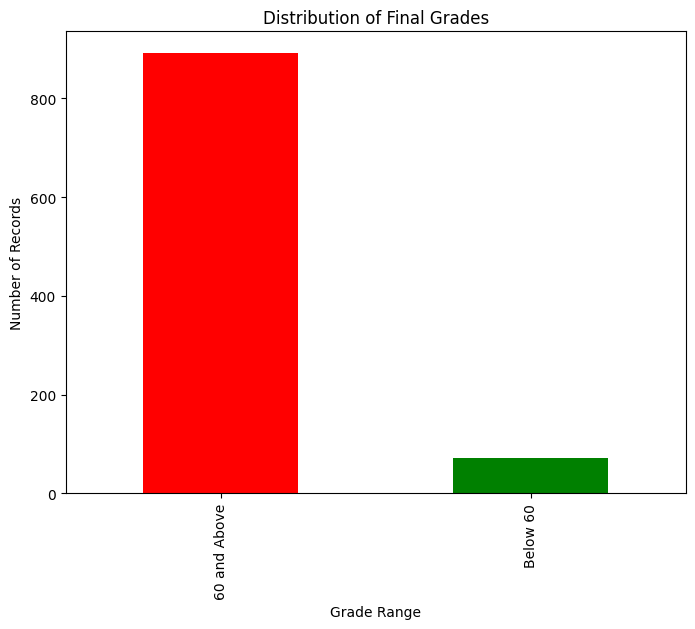

In [ ]:
import matplotlib.pyplot as plt

# Count the number of records for each category
grade_counts = df_cleaned['Final_Grade_Avg'].apply(lambda x: 'Below 60' if x < 60 else '60 and Above').value_counts()

# Display the count
print("Grade Counts:")
print(grade_counts)

# Plot a bar chart
plt.figure(figsize=(8, 6))
grade_counts.plot(kind='bar', color=['red', 'green'])
plt.title('Distribution of Final Grades')
plt.xlabel('Grade Range')
plt.ylabel('Number of Records')
plt.show()

Grade Counts in Balanced DataFrame:
60 and Above    284
Below 60         71
Name: Final_Grade_Avg, dtype: int64


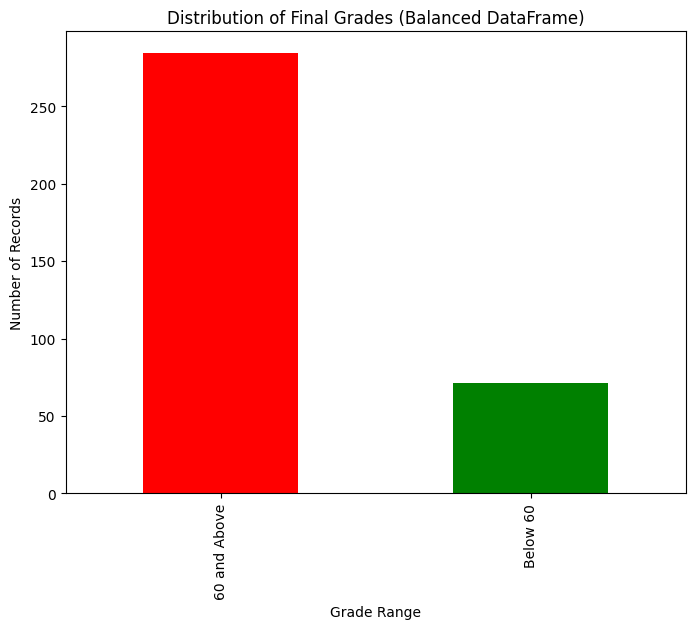

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_cleaned is your DataFrame
# Separate data into minority and majority classes
df_minority = df_cleaned[df_cleaned['Final_Grade_Avg'] < 60]
df_majority = df_cleaned[df_cleaned['Final_Grade_Avg'] >= 60]

# Randomly sample 4 times the number of minority class instances from majority class
df_majority_sampled = df_majority.sample(n=len(df_minority) * 4, random_state=42)

# Combine the minority and sampled majority classes
df_balanced = pd.concat([df_minority, df_majority_sampled])

# Display the counts in the new balanced DataFrame
print("Grade Counts in Balanced DataFrame:")
print(df_balanced['Final_Grade_Avg'].apply(lambda x: 'Below 60' if x < 60 else '60 and Above').value_counts())

# Plot a bar chart for the balanced DataFrame
plt.figure(figsize=(8, 6))
df_balanced['Final_Grade_Avg'].apply(lambda x: 'Below 60' if x < 60 else '60 and Above').value_counts().plot(kind='bar', color=['red', 'green'])
plt.title('Distribution of Final Grades (Balanced DataFrame)')
plt.xlabel('Grade Range')
plt.ylabel('Number of Records')
plt.show()


<ipython-input-7-7702e7f557e1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_balanced.corr()


Correlation Matrix for Balanced DataFrame:
                  UniqueID  LAB_Avg_PI  LAB_grade_Avg  ASSIGN_PI_avg  \
UniqueID          1.000000    0.005292      -0.009886       0.038722   
LAB_Avg_PI        0.005292    1.000000      -0.600045       0.446133   
LAB_grade_Avg    -0.009886   -0.600045       1.000000      -0.350411   
ASSIGN_PI_avg     0.038722    0.446133      -0.350411       1.000000   
ASSIGN_grade_Avg  0.015921   -0.228159       0.404216      -0.463561   
QUIZ_PI_Avg      -0.020765    0.473271      -0.419631       0.473085   
Quiz_Grade_Avg.   0.036431   -0.332824       0.596457      -0.275358   
Final_PI_Avg      0.006824    0.779660      -0.564556       0.794781   
Final_Grade_Avg   0.015870   -0.473853       0.792256      -0.438138   
final_weigth_PI   0.016437    0.694119      -0.455951       0.646748   

                  ASSIGN_grade_Avg  QUIZ_PI_Avg  Quiz_Grade_Avg.  \
UniqueID                  0.015921    -0.020765         0.036431   
LAB_Avg_PI               -0.

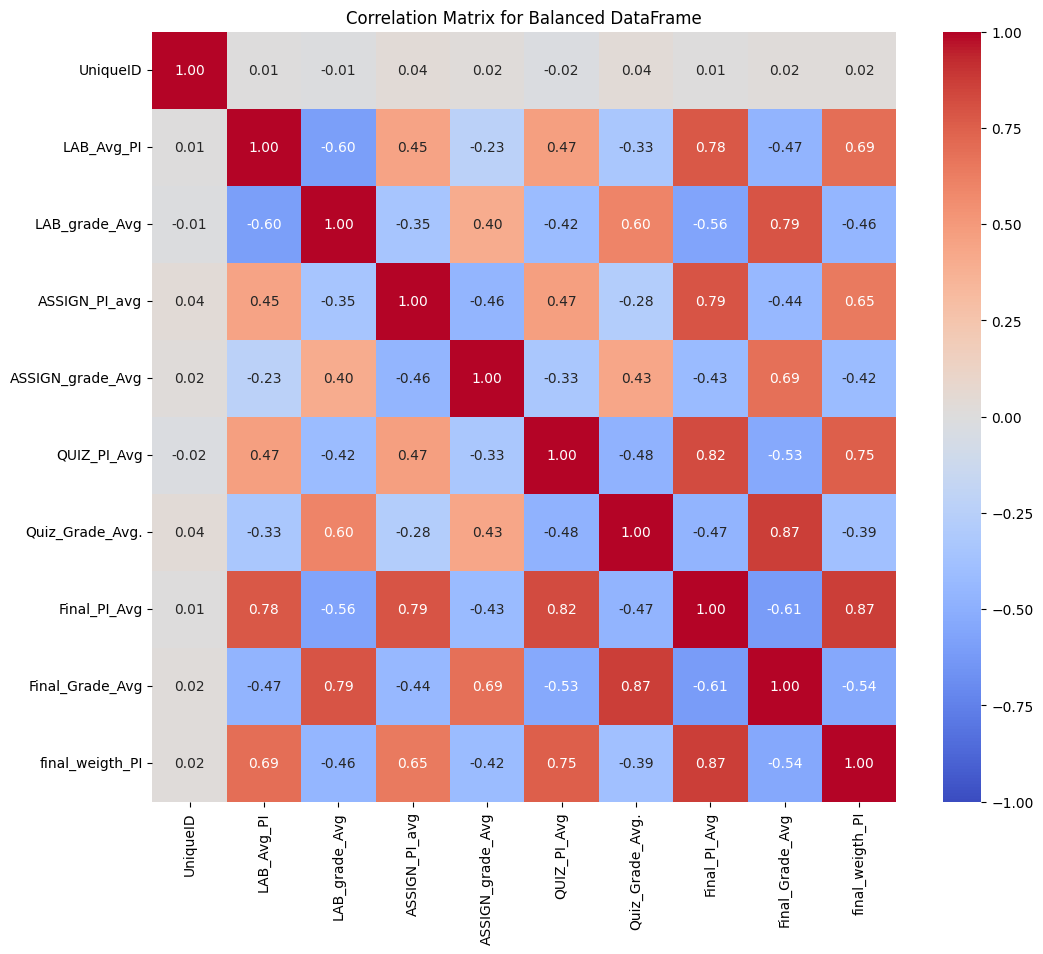

In [ ]:
# Generate correlation matrix for the balanced DataFrame
correlation_matrix = df_balanced.corr()

# Display the correlation matrix
print("Correlation Matrix for Balanced DataFrame:")
print(correlation_matrix)

# Optionally, you can create a heatmap for better visualization
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix for Balanced DataFrame')
plt.show()


In [ ]:
df_balanced.describe()

,UniqueID,LAB_Avg_PI,LAB_grade_Avg,ASSIGN_PI_avg,ASSIGN_grade_Avg,QUIZ_PI_Avg,Quiz_Grade_Avg.,Final_PI_Avg,Final_Grade_Avg,final_weigth_PI
count,3.550000e+02,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000
mean,5.080912e+07,0.266239,76.675029,0.264239,79.435098,0.262752,71.440249,0.266038,75.807270,0.216522
std,2.849945e+07,0.282802,25.433558,0.312958,22.535257,0.298220,23.512231,0.242227,19.961201,0.215853
min,3.498960e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.729109e+07,0.000000,66.700430,0.000000,72.500000,0.000000,62.482000,0.057000,70.037055,0.051000
50%,5.193280e+07,0.130000,83.315000,0.125000,85.000000,0.143000,79.000000,0.185000,82.900000,0.136000
75%,7.422475e+07,0.500000,95.486000,0.375000,97.500000,0.375000,87.500000,0.416667,89.411000,0.331071
max,9.984936e+07,1.000000,123.594000,1.000000,100.000000,1.000000,99.306000,1.000000,100.700000,1.000000


In [ ]:
# Display the number of categories and their counts for 'Section'
section_counts = df_balanced['Section'].value_counts()
print("Section Categories and Counts:")
print(section_counts)

# Display the number of categories and their counts for 'Semester'
semester_counts = df_balanced['Semester'].value_counts()
print("\nSemester Categories and Counts:")
print(semester_counts)

# Display the number of categories and their counts for 'TestControl'
test_control_counts = df_balanced['TestControl'].value_counts()
print("\nTestControl Categories and Counts:")
print(test_control_counts)


Section Categories and Counts:
1113W02    47
1112W05    35
1112W06    33
1112W04    32
1112W01    31
1112-02    31
1113W01    25
1112W02    24
1113W05    20
1113-02    15
1113-01    14
1113W04    14
1112W08    13
1113W03    11
1113W07    10
Name: Section, dtype: int64

Semester Categories and Counts:
SP23    232
SU22     56
FA22     43
SP22     24
Name: Semester, dtype: int64

TestControl Categories and Counts:
Test       181
Control    174
Name: TestControl, dtype: int64


In [ ]:
# Apply one-hot encoding to 'Section'
df_balanced = pd.get_dummies(df_balanced, columns=['Section'], prefix='Section')

# Apply one-hot encoding to 'Semester'
df_balanced = pd.get_dummies(df_balanced, columns=['Semester'], prefix='Semester')

# Apply one-hot encoding to 'TestControl'
df_balanced = pd.get_dummies(df_balanced, columns=['TestControl'], prefix='TestControl')
df_balanced.head()

,UniqueID,LAB_Avg_PI,LAB_grade_Avg,ASSIGN_PI_avg,ASSIGN_grade_Avg,QUIZ_PI_Avg,Quiz_Grade_Avg.,Final_PI_Avg,Final_Grade_Avg,final_weigth_PI,...,Section_1113W03,Section_1113W04,Section_1113W05,Section_1113W07,Semester_FA22,Semester_SP22,Semester_SP23,Semester_SU22,TestControl_Control,TestControl_Test
65,40853929,0.727,14.243,0.333,50.667,0.583,34.465,0.548,33.125,0.398,...,0,0,0,0,0,0,1,0,0,1
95,30149537,0.571,30.286,0.857,28.571,0.429,22.143,0.619,27.000,0.520,...,0,0,0,0,0,0,1,0,0,1
115,77825728,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.840,...,0,0,0,0,0,0,1,0,0,1
120,94253708,1.000,21.571,0.714,57.143,0.857,61.714,0.857,46.810,0.720,...,0,0,0,0,0,0,1,0,0,1
148,28163657,0.571,31.143,0.857,37.143,0.857,50.571,0.762,39.619,0.640,...,0,0,0,0,0,0,1,0,0,1


In [ ]:
# Create a new column 'Pass_Fail' based on the condition
df_balanced['Pass_Fail'] = df_balanced['Final_Grade_Avg'].apply(lambda x: 1 if x >= 70 else 0)

# Drop the original 'Final_Grade_Avg' column if needed
df_balanced.drop('Final_Grade_Avg', axis=1, inplace=True)

# Display the modified DataFrame
df_balanced.head()


,UniqueID,LAB_Avg_PI,LAB_grade_Avg,ASSIGN_PI_avg,ASSIGN_grade_Avg,QUIZ_PI_Avg,Quiz_Grade_Avg.,Final_PI_Avg,final_weigth_PI,Section_1112-02,...,Section_1113W04,Section_1113W05,Section_1113W07,Semester_FA22,Semester_SP22,Semester_SP23,Semester_SU22,TestControl_Control,TestControl_Test,Pass_Fail
65,40853929,0.727,14.243,0.333,50.667,0.583,34.465,0.548,0.398,0,...,0,0,0,0,0,1,0,0,1,0
95,30149537,0.571,30.286,0.857,28.571,0.429,22.143,0.619,0.520,0,...,0,0,0,0,0,1,0,0,1,0
115,77825728,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.840,0,...,0,0,0,0,0,1,0,0,1,0
120,94253708,1.000,21.571,0.714,57.143,0.857,61.714,0.857,0.720,0,...,0,0,0,0,0,1,0,0,1,0
148,28163657,0.571,31.143,0.857,37.143,0.857,50.571,0.762,0.640,0,...,0,0,0,0,0,1,0,0,1,0


In [ ]:
column_names = df_balanced.columns.tolist()
print(column_names)


['UniqueID', 'LAB_Avg_PI', 'LAB_grade_Avg', 'ASSIGN_PI_avg', 'ASSIGN_grade_Avg', 'QUIZ_PI_Avg', 'Quiz_Grade_Avg.', 'Final_PI_Avg', 'final_weigth_PI', 'Section_1112-02', 'Section_1112W01', 'Section_1112W02', 'Section_1112W04', 'Section_1112W05', 'Section_1112W06', 'Section_1112W08', 'Section_1113-01', 'Section_1113-02', 'Section_1113W01', 'Section_1113W02', 'Section_1113W03', 'Section_1113W04', 'Section_1113W05', 'Section_1113W07', 'Semester_FA22', 'Semester_SP22', 'Semester_SP23', 'Semester_SU22', 'TestControl_Control', 'TestControl_Test', 'Pass_Fail']


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.56      0.67        18
           1       0.86      0.96      0.91        53

    accuracy                           0.86        71
   macro avg       0.85      0.76      0.79        71
weighted avg       0.86      0.86      0.85        71

Accuracy: 0.8591549295774648


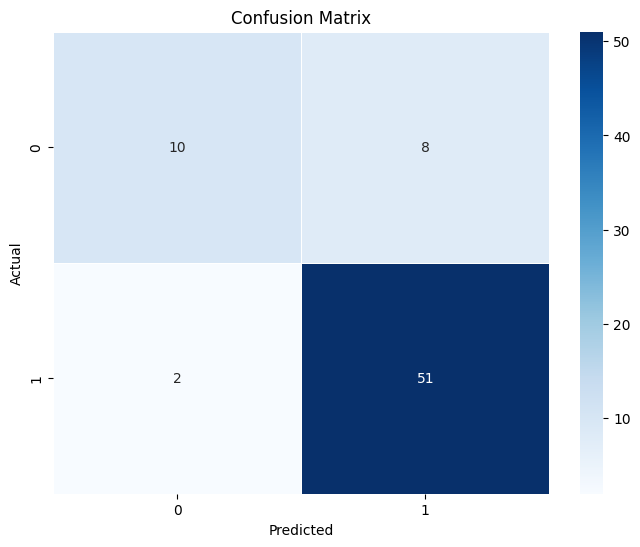

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define independent variables (X) and dependent variable (y)
X = df_balanced[['LAB_Avg_PI', 'ASSIGN_PI_avg', 'QUIZ_PI_Avg', 'Section_1112-02', 'Section_1112W01', 'Section_1112W02', 'Section_1112W04', 'Section_1112W05', 'Section_1112W06', 'Section_1112W08', 'Section_1113-01', 'Section_1113-02', 'Section_1113W01', 'Section_1113W02', 'Section_1113W03', 'Section_1113W04', 'Section_1113W05', 'Section_1113W07', 'Semester_FA22', 'Semester_SP22', 'Semester_SP23', 'Semester_SU22', 'TestControl_Control', 'TestControl_Test']]
y = df_balanced['Pass_Fail']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', linewidths=.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Epoch 1/100
15/15 [==============================] - 1s 19ms/step - loss: 0.6866 - accuracy: 0.6344 - val_loss: 0.6195 - val_accuracy: 0.7368
Epoch 2/100
15/15 [==============================] - 0s 6ms/step - loss: 0.6514 - accuracy: 0.6828 - val_loss: 0.5950 - val_accuracy: 0.7368
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 0.6031 - accuracy: 0.7137 - val_loss: 0.5752 - val_accuracy: 0.7368
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 0.5702 - accuracy: 0.7577 - val_loss: 0.5614 - val_accuracy: 0.7368
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 0.5171 - accuracy: 0.7225 - val_loss: 0.5469 - val_accuracy: 0.7368
Epoch 6/100
15/15 [==============================] - 0s 4ms/step - loss: 0.5646 - accuracy: 0.7181 - val_loss: 0.5344 - val_accuracy: 0.7544
Epoch 7/100
15/15 [==============================] - 0s 6ms/step - loss: 0.5519 - accuracy: 0.7357 - val_loss: 0.5259 - val_accuracy: 0.7544
Epoch 8/100


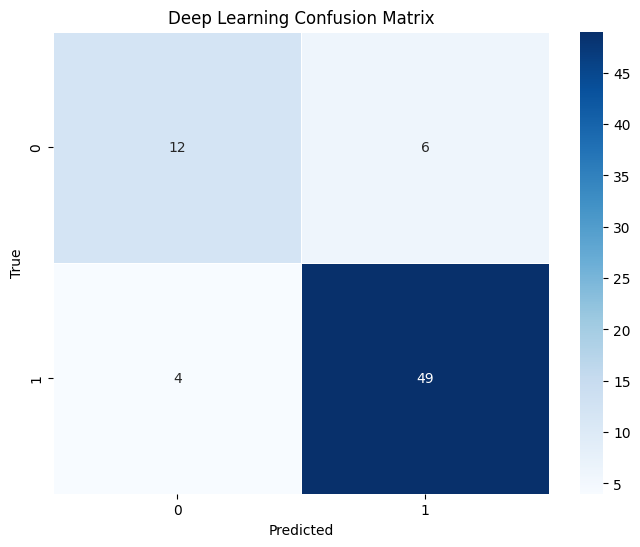

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the deep learning model
model_dl = Sequential([
    Dense(64, input_shape=(X_train_scaled.shape[1],), activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification, so using sigmoid activation
])

# Compile the model
model_dl.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Use early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10)

# Train the model
history = model_dl.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=16, callbacks=[early_stop])

# Evaluate the model on test data
loss, accuracy = model_dl.evaluate(X_test_scaled, y_test)
print(f"\nTest Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Predictions
y_pred_dl = (model_dl.predict(X_test_scaled) > 0.5).astype("int32")

# Display classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dl))
print("Accuracy:", accuracy_score(y_test, y_pred_dl))

# Confusion Matrix
conf_matrix_dl = confusion_matrix(y_test, y_pred_dl)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dl, annot=True, cmap='Blues', fmt='g', linewidths=.5)
plt.title('Deep Learning Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        18
           1       0.92      0.92      0.92        53

    accuracy                           0.89        71
   macro avg       0.85      0.85      0.85        71
weighted avg       0.89      0.89      0.89        71

Accuracy: 0.8873239436619719


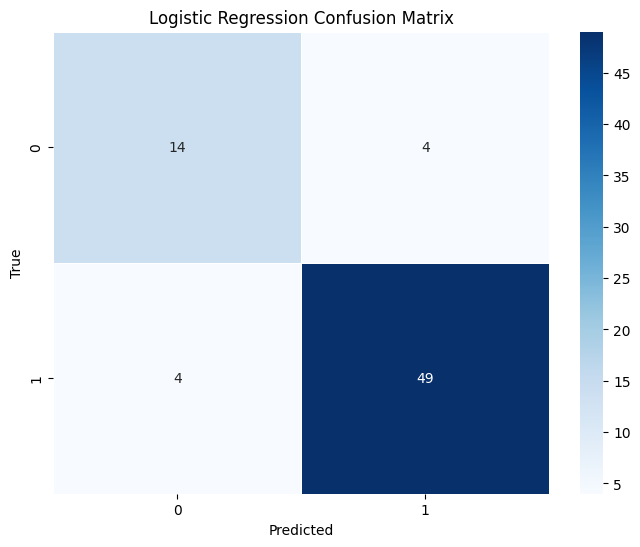

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the logistic regression model
model_lr = LogisticRegression(max_iter=10000)  # Increase max_iter for convergence if needed

# Train the model
model_lr.fit(X_train_scaled, y_train)

# Predictions on test data
y_pred_lr = model_lr.predict(X_test_scaled)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

# Confusion Matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, cmap='Blues', fmt='g', linewidths=.5)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
